<a href="https://colab.research.google.com/github/Maternowsky/Maternowsky/blob/main/Perceptron%2C_Logistic_Regression%2C_SVM%2C_Decision_Tree%2C_KNN_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data Set**

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))



Class labels: [0 1 2]


# **Split to test and train data sets**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1,stratify = y)

## **checking stratification of train_test_split using np.bincount()**

In [4]:
print("Labels counts in y: ", np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

Labels counts in y:  [50 50 50]
Labels counts in y_train:  [35 35 35]
Labels counts in y_test:  [15 15 15]


## **impimenting feature scaling for optimal performance**

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
# using the fit method StandardScaler estimated the parameters,(sample mean) and
#(standard deviation) for each feature dimension from the training data

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# by calling the transform method, we then standardized the training data using
#those estimated parameters, μ and σ

                          

## **importing Perceptron with one-versus-rest (OvR) by default**

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

# **Making prediction using predict method**

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())


# misclassification error is 2.2% or 1 out of 45 flowers

Misclassified examples: 1


In [8]:
#calculate the calssification accuracy 

from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.978


# **Plotting Perceptron results with matplotlib**

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() +1
  x2_min, x2_max = X[:, 1].min() -1, X[:,1].max() +1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0],
                y=X[y==cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = f'Class {cl}',
                edgecolor = 'black')
    if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0 ], X_test[:, 1],
                  c = 'none', edgecolor='black',
                  alpha = 1.0, linewidth = 1,
                  marker = 'o', s=100,
                  label = 'Test set')

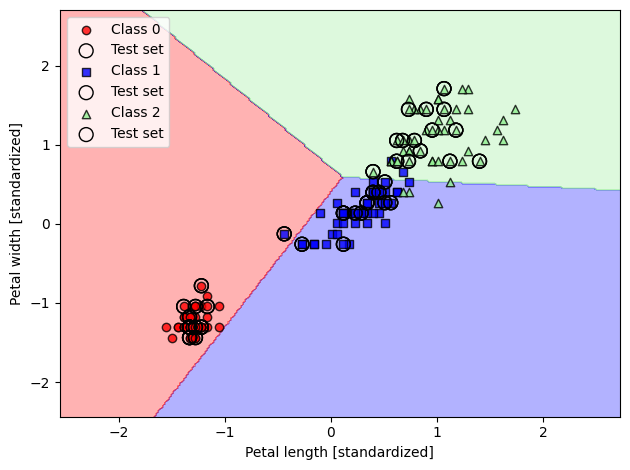

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                      y = y_combined,
                      classifier = ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# **Plotting the sigmoid function**

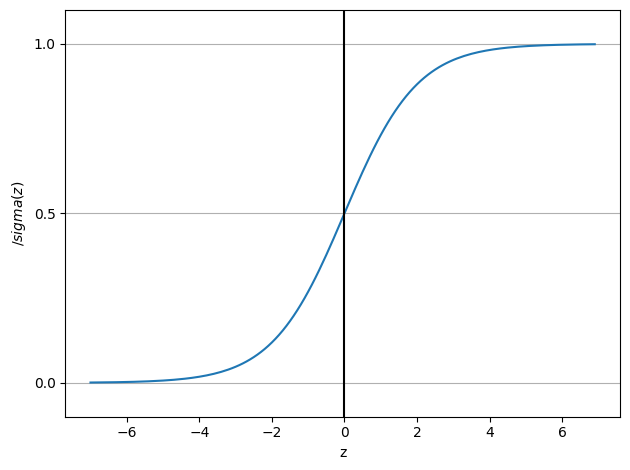

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0/ (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$/sigma (z)$')

#y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# **Create plot that illustrates the loss of classifying a single training example for different values of sigma(z)**

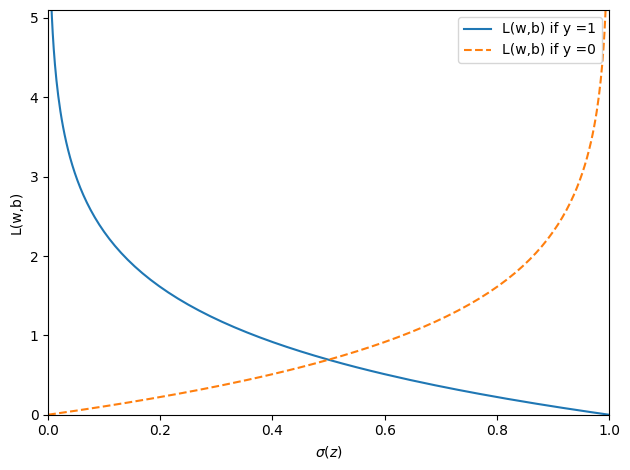

In [12]:
def loss_1(z):
  return -np.log(sigmoid(z))
def loss_0(z):
  return -np.log(1-sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label = 'L(w,b) if y =1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle = '--', label = 'L(w,b) if y =0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w,b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# **Implement full batch gradient descent**

In [13]:
class LogisticRegressionGD:
  def __init__(self, eta=0.01, n_iter=50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = X.shape[1])
    self.b_=np.float_(0.)
    self.losses_=[]
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b_ += self.eta * 2.0 * errors.mean()
      loss = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output))))
      self.losses_.append(loss)
      return self
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

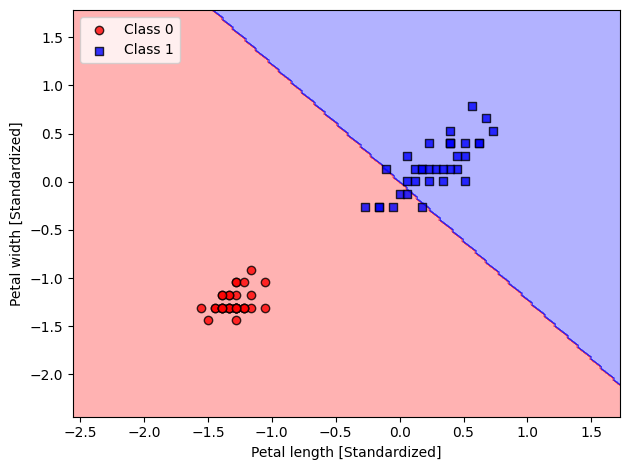

In [14]:
X_train_01_subset = X_train_std[(y_train == 0 ) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.3 , n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)
plot_decision_regions(X = X_train_01_subset,
                      y = y_train_01_subset,
                      classifier = lrgd)
plt.xlabel('Petal length [Standardized]')
plt.ylabel('Petal width [Standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()


# **Training a logistic regression model with scikit-learn**

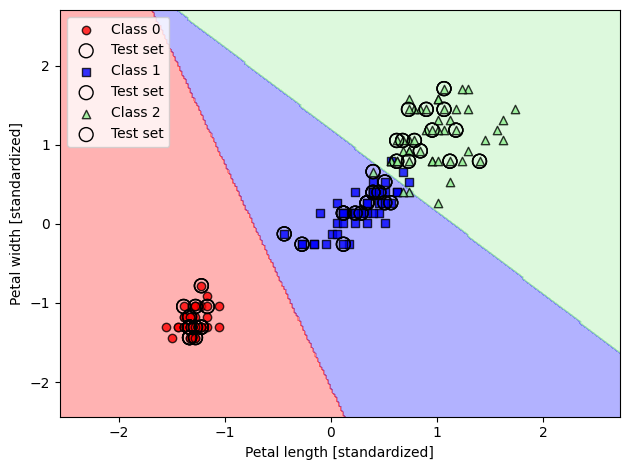

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier = lr, test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## **changing multi_class from 'ovr' to 'multinomial' **

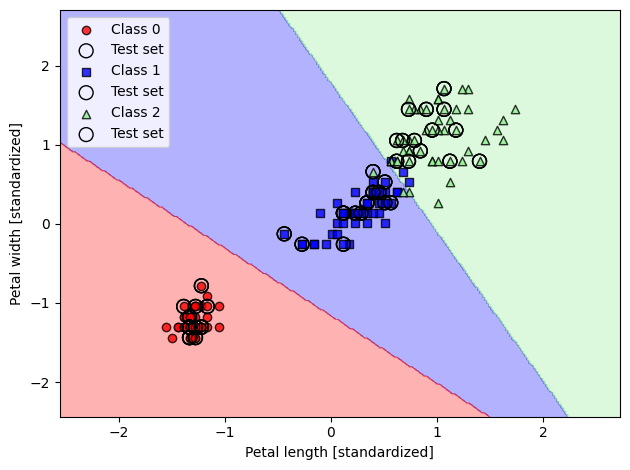

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver = 'lbfgs', multi_class = 'multinomial')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier = lr, test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [17]:
lr.predict_proba(X_test_std[:3,:])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [18]:
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [19]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

## **most convenient way is to use scikits predict method**

In [20]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

## **converting single row entry to two dimensional data array using numpy reshap **

In [21]:
lr.predict(X_test_std[0, :].reshape(1,-1))

array([2])

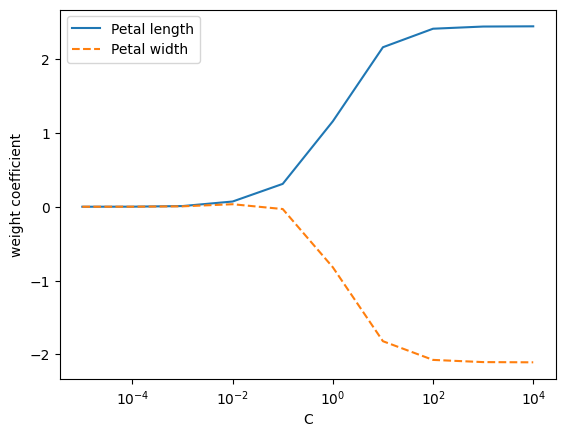

In [22]:
weights, params = [] , []
for c in np.arange(-5,5):
  lr = LogisticRegression(C=10.**c,
                          multi_class = 'ovr')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = 'Petal length')
plt.plot(params, weights[:, 1], linestyle = '--', label = 'Petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc= 'upper left')
plt.xscale('log')
plt.show()

### [graph above] Increasing regularization strength( by reducing C which is inversly proportional) can reduce overfitting. But strongly regularized models create weight coefficients that approach zero, which means models can perform poorly due to underfitting

# **(SVM) Training a Support Vector Machine with scikit learn**

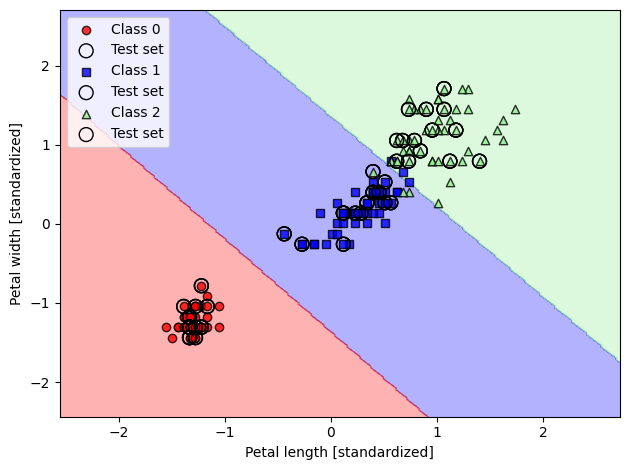

In [23]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C= 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier = svm,
                      test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## **SGDClassifier to implement perceptron, logistic regression, SVM**

In [24]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# **Kernel methods for linearly inseperable data**

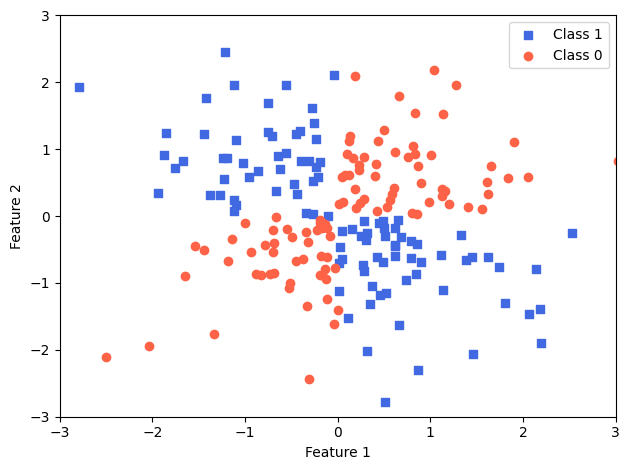

In [25]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,
                       X_xor[:,1]>0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'royalblue', marker = 's',
            label = 'Class 1')
plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0 ,1],
            c = 'tomato', marker = 'o',
            label = 'Class 0')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## To use the SVM model on non linearly seperable data we can transform the data from 2D to 3D. But doing so is computationally expensive so we can define a [kernel function]. One widely used kernel function is the [radial basis function(RBF)] can simply be called [Gaussian kernel]

## **Now we train a kernel SVM that is able to draw a nonlinear decision boundary that separates the XOR data.**
## replace kernel = 'linear' kernel = 'rbf'

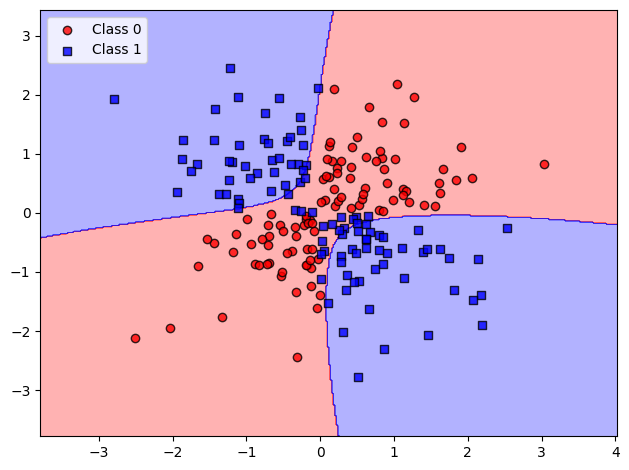

In [26]:
svm = SVC(kernel= 'rbf', random_state = 1,
          gamma = 0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## ** Applying SVM to Iris dataset to understand the cutoff- parameter for the Gaussian sphere [gamma = 0.1]**

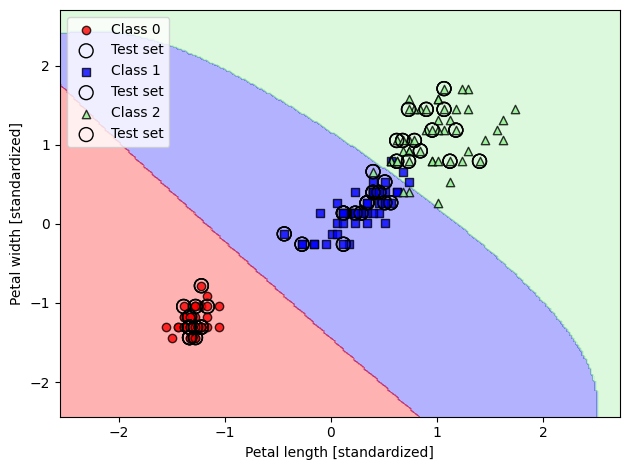

In [27]:
svm = SVC(kernel='rbf', random_state=1,gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## now we increase the value of γ [gamma] and see the decision boundary change

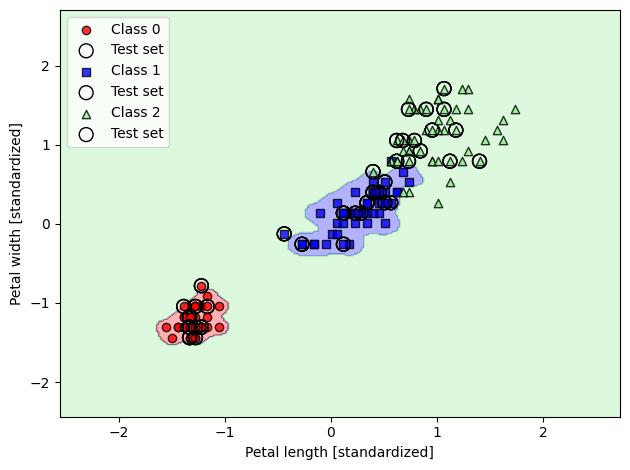

In [28]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 100.0, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## [above] you can see the decision boundary around classes 0 and 1 is tighter with a large value of γ[gamma]

## The model fits the training dataset very well but would likely have high generalization data on unseen data

# **Decision Tree**

## **Three impurity measures or splitting criteria**
## Gini impurity (Ig)
## entropy (Ih)
## classification error (Ie)

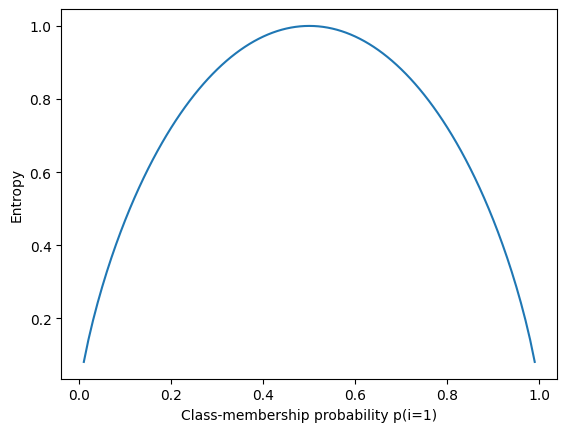

In [29]:
def entropy(p):
  return -p*np.log2(p) - (1-p) * np.log2((1-p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x,ent)
plt.show()

## Gini impurity is maximal if the classes are prefectly mixed. In practice the Gini impurity and Entropy yield similar results. Better to focus on different pruning cut-offs

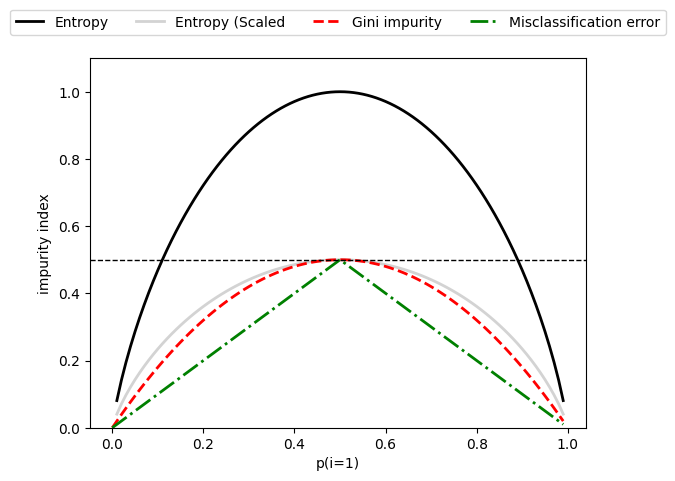

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
  return p*(1-p) + (1-p)*(1-(1-p))
def entropy(p):
  return -p*np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
  return 1 - np.max([p, 1-p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i , lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                           ['Entropy', 'Entropy (Scaled', 'Gini impurity'
                           ,'Misclassification error'],['-','-','--','-.'],
                           ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.15), ncol = 5,
          fancybox = True, shadow = False)
ax.axhline(y=0.5, linewidth =1, color = 'k', linestyle= '--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()



# **Training a decision tree**

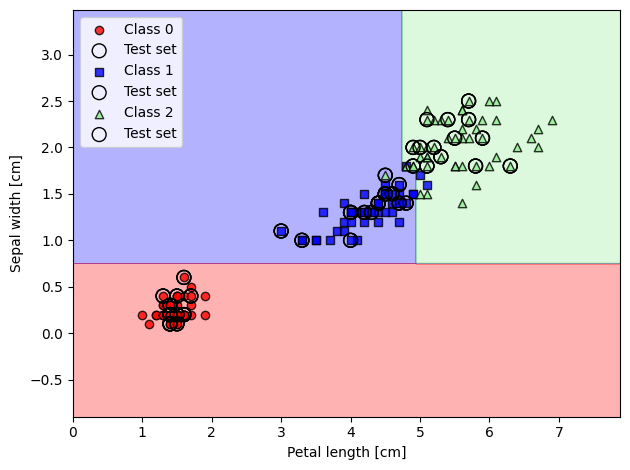

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 4,
                                    random_state = 1)
tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier = tree_model,
                      test_idx = range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

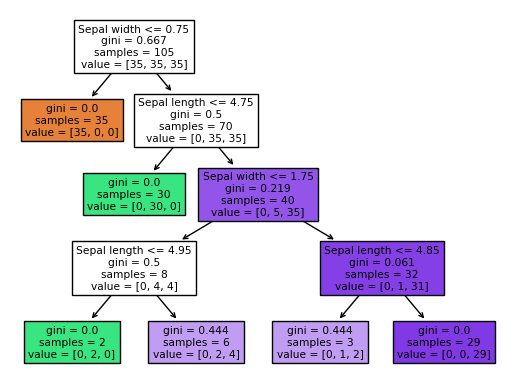

In [32]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width',
                                     'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names = feature_names,
               filled = True)
plt.show()

# **Multiple decision trees via random forests**

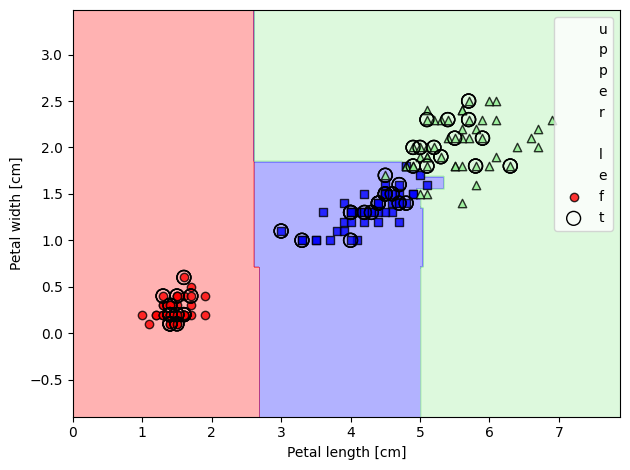

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest =RandomForestClassifier(n_estimators = 25, random_state = 1,
                               n_jobs = 2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined, y_combined, classifier= forest,
                      test_idx=range(105,150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend('upper left')
plt.tight_layout()
plt.show() 

### we trained the model from 25 decision trees via the n_estimators, we used n_jobs to parallelize the model training using multiple cores of the cpu. 2 in our case

# **KNN - K-nearest neighbor algorithm**

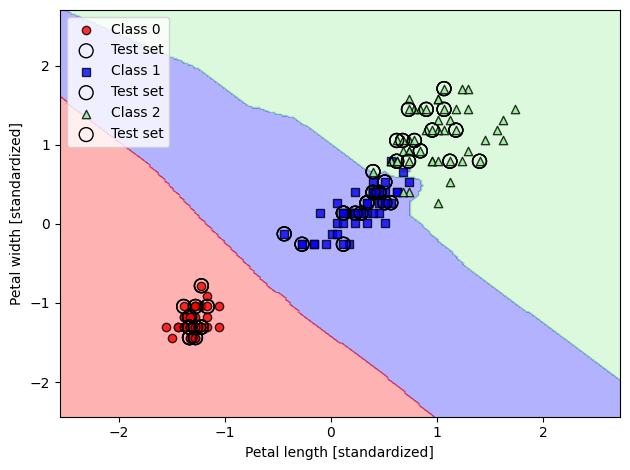

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = knn,
                      test_idx = range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## minkowski distance used [above] is a generalization of the Euclidean and Manhattan distance. It becomes Euclidean if p=2 and Manhattan if p=1